## Aplicação

Pela definição da função hipótese da regressão linear de duas variáveis,temos que :


$$[1]: h_\theta(x_1, x_2)=\theta_0 + \theta_1.x_1 + \theta_2.x_2$$ 


E a função de custo é caracterizada por:

$$[2]: J(\theta_0,\theta_1, \theta_2)=\frac{1}{2.m}\sum_{i=1}^{m}[h_\theta(x_1^{(i)}, x_2^{(i)})-y_i]^2$$

Pelo Método do 'Gradient Descent', devemos tomar varias iterações partindo de um valor previamente definido de $\theta_1$ e $\theta_2$, e partir daí, tomarmos a derivada multiplicada pela taxa de aprendizado, para atualizarmos os pesos do hiperplano que fornece uma aproximação linear de modo a minimizarmos o custo. Matematicamente, aplicamos a definição de gradiente na equação $[2]$:

Substituindo $[1]$ em $[2]$ e desenvolvendo esta última equação teremos:

$$[2.1]:  \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_0}} = \frac{1}{2.m}\sum_{i=1}^{m} 2.[h_\theta(x_1^{(i)}, x_2^{(i)})-y_i].[1]$$
$$[2.2]:  \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_1}} = \frac{1}{2.m}\sum_{i=1}^{m} 2.[h_\theta(x_1^{(i)}, x_2^{(i)})-y_i].[x_1^{(i)}]$$
$$[2.3]:  \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_2}} = \frac{1}{2.m}\sum_{i=1}^{m} 2.[h_\theta(x_1^{(i)}, x_2^{(i)})-y_i].[x_2^{(i)}]$$


Ao atualizarmos os valores de com o tempo teremos:


$$[3.1] :\theta_0 = \theta_0 - \alpha . \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_0}}$$

$$[3.2]: \theta_1 = \theta_1 - \alpha . \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_1}}$$

$$[3.3]: \theta_2 = \theta_2 - \alpha . \frac{\partial{J(\theta_0,\theta_1,\theta_2)}}{\partial{\theta_2}}$$


Repetimos os valores quantas iterações quanto necessário, na simulação abaixo com Python considerei uma taxa de aprendizado de $10^{-7}$ e cerca de 1000 iterações:


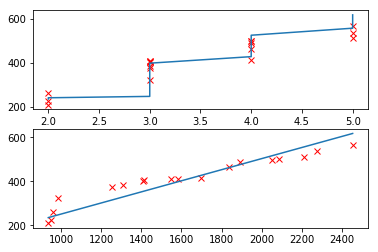

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Gerando dados aleatórios
larea=np.random.randint(900,3000,18)
price=np.random.randint(200,600,18)
bedrooms=np.random.randint(2,6,18)

def h(x1,x2, t0=0.0, t1=0.0, t2=0.0):#Função de hipótese para dados dois pontos x
    return theta0 + theta1*x1 + theta2*x2
    
def J(x,y,p,num=0):#Implementação da Função de Custo
    num=[(h(x[i],y[i])-p[i])**2 for i in range(len(x))]
    return sum(num)/2

#inicialização dos pesos
theta0,theta1,theta2=0.0,0.0,0.0

#médias dos vetores
lam,pm,bm=np.mean(larea),np.mean(bedrooms),np.mean(price)

#Aplicação do "feature scaling"
lanorm=[(xi-lam)/(max(larea)-min(larea)) for xi in larea]  
pricenorm=[(xi-pm)/(max(price)-min(price)) for xi in price]  
bnorm=[(xi-pm)/(max(bedrooms)-min(bedrooms)) for xi in bedrooms]  

#taxa de aprendizagem
alfa=1*1e-7

#Ordenando os vetores
larea=np.sort(larea)
price=np.sort(price)
bedrooms=np.sort(bedrooms)

pd.DataFrame({'Living Area':larea, 'Bedrooms':bedrooms, 'Price':price}).to_excel('Precos.xlsx')

ltheta0,ltheta1,ltheta2=[],[],[]

for i in range(1000):
    #Atualização dos pesos via "Gradient Descent" através da derivada da função custo
    theta0-=alfa*(sum([(h(larea[i],bedrooms[i],t0=theta0,t1=theta1,t2=theta2)-price[i]) for i in range(len(larea))])/18)
    theta1-=alfa*(sum([(h(larea[i],bedrooms[i],t0=theta0,t1=theta1,t2=theta2)-price[i])*(larea[i]) for i in range(len(larea))])/18)
    theta2-=alfa*(sum([(h(larea[i],bedrooms[i],t0=theta0,t1=theta1,t2=theta2)-price[i])*(bedrooms[i]) for i in range(len(larea))])/18)
    ltheta0.append(theta0);ltheta1.append(theta1);ltheta2.append(theta2)

df=pd.DataFrame({'Theta0':ltheta0, 'Theta1':ltheta1, 'Theta2':ltheta2})
#Salvando dados no Excel
df.to_excel("Ajustes dos pesos.xlsx")

#Vetor hipótese
hip=h(larea,bedrooms,theta0,theta1,theta2)

plt.subplot(211)
plt.plot(bedrooms,price,'rx')
plt.plot(bedrooms,hip)
plt.plot()
plt.subplot(212)
plt.plot(larea, price,'rx')
plt.plot(larea,hip)

plt.savefig('gráficos.png')
plt.show()




Obteve-se a partir de então os gráficos da função hipótese, assim como os diversos pontos randômicos em um mesmo plot. Ocorreu um erro de regressão da quantidade de quartos que acabou sofrendo uma deformação imprevista, porém a área em função do preço adaptou-se corretamente.

## Referências:
$[1]$:CS229 Lecture notes, por Andrew Ng